## **Importing Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Data Loading:**

In [ ]:
# Load dataset
heart_data = pd.read_csv('heart.csv')

## **Basic Data analysis:**


In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# The number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
# Checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


## **Data Cleaning:**

In [ ]:
# Checking class distribution before applying SMOTE
print("Before SMOTE:\n", heart_data['target'].value_counts())

Before SMOTE:
 target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Splitting features and target variable
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']
print(x)
print(y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
# Checking class distribution after SMOTE
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())

After SMOTE:
 target
0    526
1    526
Name: count, dtype: int64


In [ ]:
# Apply SMOTE to balance the dataset
x_resampled, y_resampled = smote.fit_resample(x, y)

## **EDA(Exploratory data analysis):**

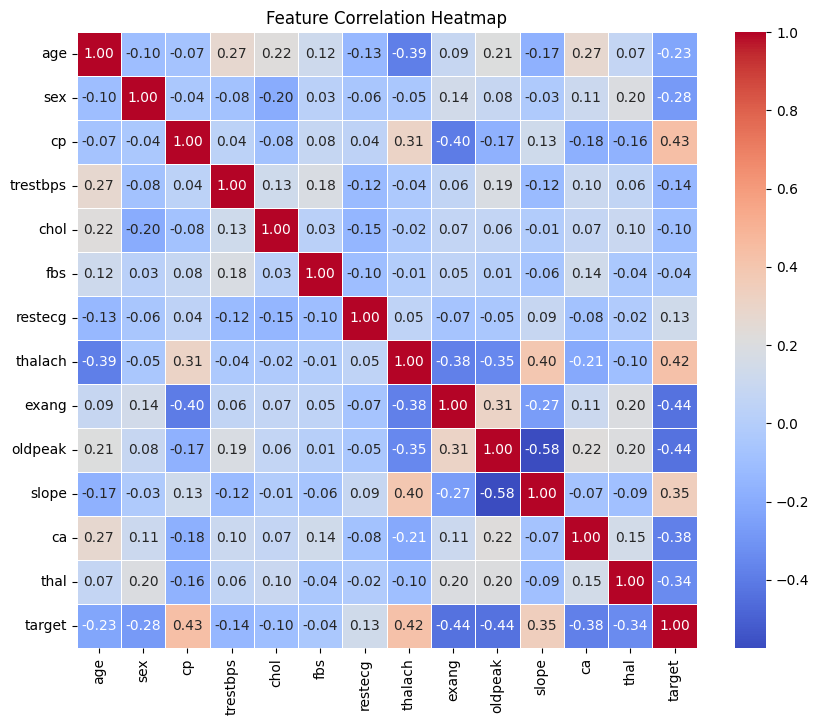

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

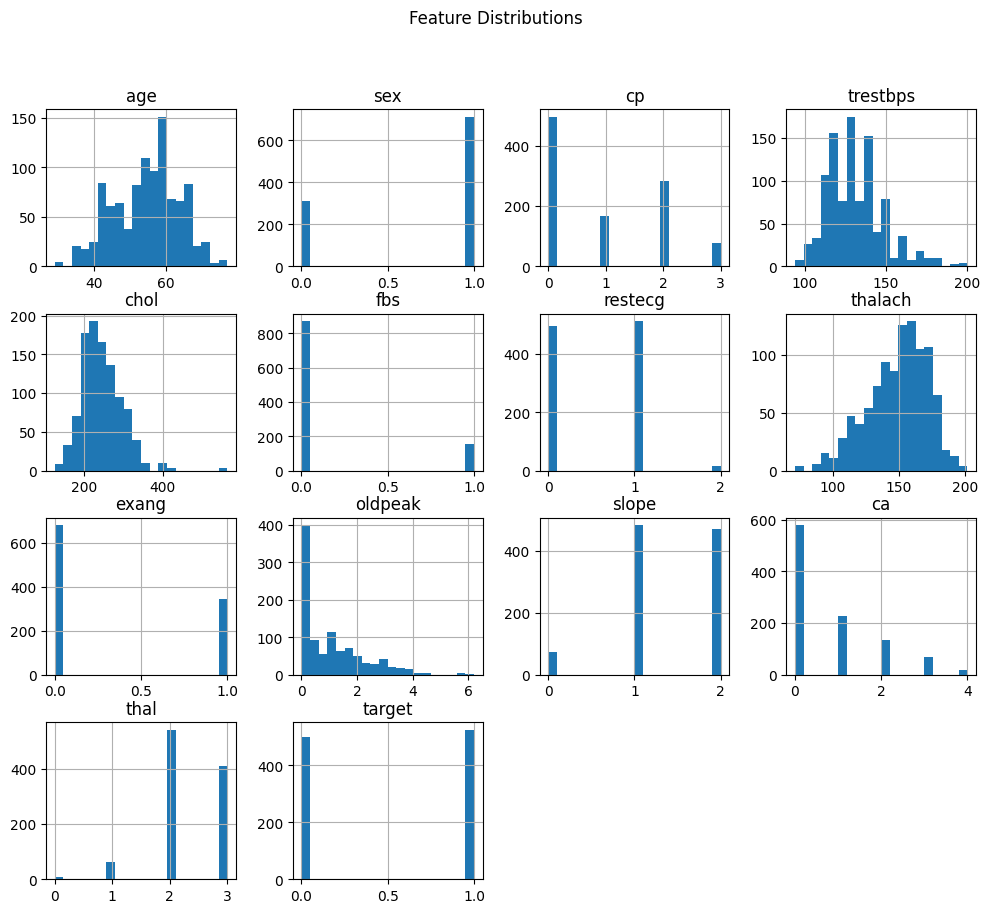

In [ ]:
# Histograms of Features
heart_data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

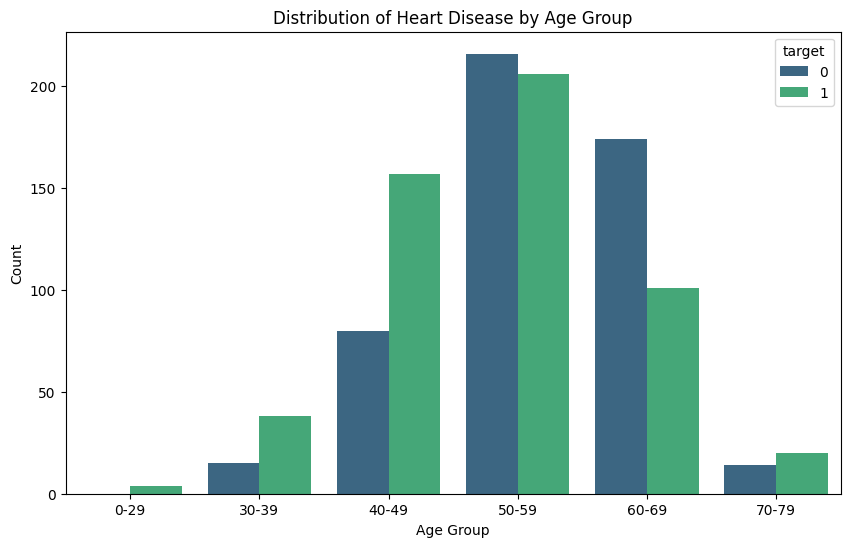

In [ ]:
# Create age bins
age_bins = [0, 30, 40, 50, 60, 70, 80]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=age_bins, labels=age_labels, right=False)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=heart_data, x='age_group', hue='target', palette='viridis')
plt.title('Distribution of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## **Train test split:**

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=2)

## **Applying model:**

In [ ]:
# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Train the model
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:15:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Evaluate accuracy
x_train_pred = xgb_model.predict(x_train)
train_accuracy = accuracy_score(y_train, x_train_pred)
print("XGBoost - Accuracy on Training Data:", train_accuracy)

XGBoost - Accuracy on Training Data: 0.9869203329369798


In [ ]:
x_test_pred = xgb_model.predict(x_test)
test_accuracy = accuracy_score(y_test, x_test_pred)
print("XGBoost - Accuracy on Testing Data:", test_accuracy)

XGBoost - Accuracy on Testing Data: 0.966824644549763


## **Evalution metrics:**

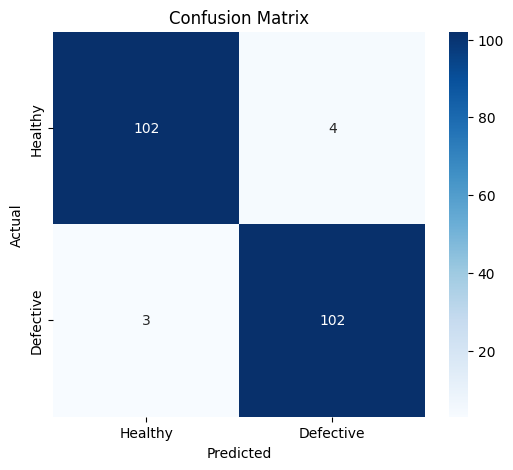

In [ ]:
# ===================== Confusion Matrix =====================
conf_matrix = confusion_matrix(y_test, x_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Healthy", "Defective"], yticklabels=["Healthy", "Defective"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, x_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       106
           1       0.96      0.97      0.97       105

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



## <span style="color:blue">**Prediction on new data:**</span>




In [ ]:
def get_user_input():
    # User input for each feature
    age = int(input("Age: "))
    sex = int(input("Sex (1 = male; 0 = female): "))
    cp = int(input("Chest pain type (0-3): "))
    trestbps = int(input("Resting blood pressure (in mm Hg): "))
    chol = int(input("Serum cholesterol in mg/dl: "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): "))
    restecg = int(input("Resting electrocardiographic results (0-2): "))
    thalach = int(input("Maximum heart rate achieved: "))
    exang = int(input("Exercise induced angina (1 = yes; 0 = no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slope = int(input("Slope of the peak exercise ST segment (0-2): "))
    ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect): "))

    # Change the input data to a numpy array
    input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the numpy array as we are predicting for only one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Prediction using the trained model
    prediction = xgb_model.predict(input_data_reshaped)

    print(prediction)

    if (prediction[0] == 0):
        print("The person does not have Heart Disease")
    else:
        print("The person has Heart Disease")

# Call the function to get user input and make a prediction
get_user_input()

## **Saving the trained model:**

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
for column in x.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
